# EN3160 Assignment 1 on Intensity Transformations and Neighborhood Filtering #


## Implement the intensity transformation  ##



(-0.5, 719.5, 809.5, -0.5)

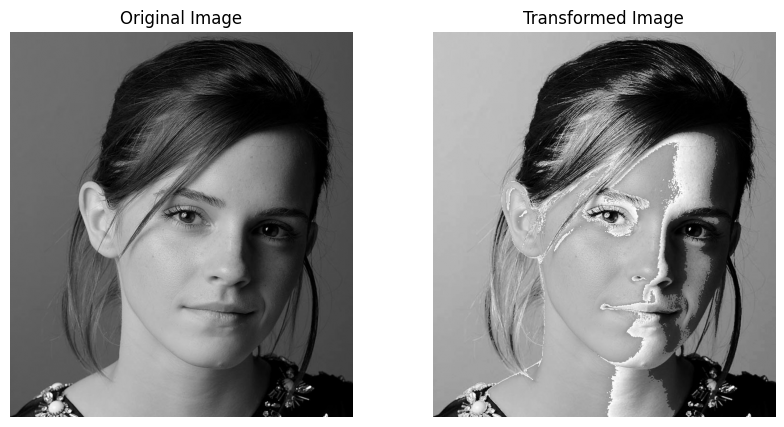

In [1]:
import  cv2
import  numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Read image ( BGR format by default)

img = cv2.imread('a1images/emma.jpg',cv2.IMREAD_GRAYSCALE)



def intensity_transformation(imge,a ,b ):
    result = np.zeros(imge.shape, dtype=np.uint8)

    for i in range(imge.shape[0]):
        for j in range(imge.shape[1]):
            r = imge[i,j]
            if 50 <= r <= 150:
                result[i, j] = np.clip(a * r + b, 0, 255)
            else:
                result[i, j] = r

    return result


transformed_img = intensity_transformation(img,1.55,22.5)
plt.figure(figsize=(10, 5))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Transformed image
plt.subplot(1, 2, 2)
plt.imshow(transformed_img, cmap='gray')
plt.title('Transformed Image')
plt.axis('off')
